#### Sampling, Proportions, and Thresholds


#### Power Analysis and Sampling for Identifying Dialogue versus Toxic Comments
- **Objective**: Work with a representative but manageable subset of a large dataset containing 44 million rows, focusing on distinguishing dialogue comments from toxic comments without sacrificing statistical rigor.
- **Methodology**:
    1. **Power Analysis**: Determine the sample size using effect size, alpha, and power parameters.
    2. **Sampling Strategy**: Apply time-based sampling based on the required sample size or ratio.
    3. **Implementation**: Utilize Python functions for power analysis and sampling data from a directory containing parquet files.

#### Parameter Descriptions
   Alpha, power, and effect size help quantify the risk of errors, sensitivity of the test, and degree of difference between groups when determining the appropriate sampling plan:
   - **Alpha (α)**: Probability of Type I error (false positive). Set at 0.05, ensuring a 5% chance of falsely labeling a dialogue comment as non-dialog.
   - **Power**: Probability of correctly rejecting the null hypothesis (true positive). Set at 0.8, ensuring an 80% chance of correctly identifying dialog comments.
   - **Effect Size**: Magnitude of difference between groups. Selected 0.01, implying subtle differences between dialogue and non-dialog in the dataset.

#### Example Cases:
- **Type I Error**: Falsely classifying a dialogue comment as toxic.
- **Type II Error**: Failing to detect a toxic comment.
- **Balancing Errors**: Alpha=0.05 and power=0.8 emphasize minimizing false positives and maximizing true positives.
- **Effect Size Interpretation**: Small effect size (0.01) indicates closely related non-dialogue and dialogue comments, requiring careful analysis and potentially larger samples.

The parameters reflect a conservative, finely-tuned approach, prioritizing the preservation of genuine dialogue. They minimize the exclusion of real dialogue, even at the risk of allowing non-dialog comments, aligning with the specific task in differentiating dialogue from non-dialogue comments. The methodology provides a robust framework for further research and exploration in this domain.

In [20]:
# Considering the objective to distinguish dialogue comments from toxic comments:
# - Alpha (0.05) minimizes the chance of falsely labeling a dialogue comment as non-dialog.
# - Power (0.8) ensures an 80% chance of correctly identifying non-dialog.
# - Effect size (0.01) indicates subtle differences between dialogue and non-dialog.
# The overall approach emphasizes preserving genuine dialogue while still being vigilant against non-dialog.

from statsmodels.stats.power import zt_ind_solve_power
from statsmodels.stats.proportion import proportions_ztest
from utils import fnSampling
import os
import pandas as pd
import logging

def power_analysis(effect_size, alpha, power):
    '''
    Function to perform power analysis and determine sample size
    Parameters:
        effect_size: The minimum effect size you want to be able to detect
        alpha: Probability of rejecting the null hypothesis when it is true (false positive)
        power: Probability of correctly rejecting the null hypothesis when the alternative hypothesis is true (true positive)
    Returns:
        int: Required sample size
    '''
    return int(zt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power))

# Parameters for power analysis
alpha = 0.05        # Significance level
power = 0.8        # Desired power
effect_size = 0.01  # Small effect size for dialogue-toxic classification

# Perform Power Analysis to find required sample size
sample_size = power_analysis(effect_size, alpha, power)

# Directory containing the parquet files
directory = '/data_drive/processed/batched/'
total_rows = fnSampling.count_total_rows(directory)

# Frequency for time-based sampling (Hourly in this case)
freq = 'H'

# Calculate the sampling ratio
sample_ratio = sample_size / total_rows
print('Sampling ratio: {}'.format(sample_ratio))

Total number of files processed 19 containing: 44284974 rows
Sampling ratio: 0.0035447011891663297


INFO:root:Processed file 0122_162025.parquet, Total Rows Processed: 162025, Sampled Data Size: 554
INFO:root:Processed file 0123_2301123.parquet, Total Rows Processed: 2463148, Sampled Data Size: 8609
INFO:root:Processed file 0222_1742452.parquet, Total Rows Processed: 4205600, Sampled Data Size: 9281
INFO:root:Processed file 0223_3205670.parquet, Total Rows Processed: 7411270, Sampled Data Size: 9953
INFO:root:Processed file 0322_2643428.parquet, Total Rows Processed: 10054698, Sampled Data Size: 19205
INFO:root:Processed file 0323_4473193.parquet, Total Rows Processed: 14527891, Sampled Data Size: 34855
INFO:root:Processed file 0422_1969912.parquet, Total Rows Processed: 16497803, Sampled Data Size: 41761
INFO:root:Processed file 0423_3537356.parquet, Total Rows Processed: 20035159, Sampled Data Size: 54136
INFO:root:Processed file 0522_1885314.parquet, Total Rows Processed: 21920473, Sampled Data Size: 54880
INFO:root:Processed file 0523_3295992.parquet, Total Rows Processed: 252164

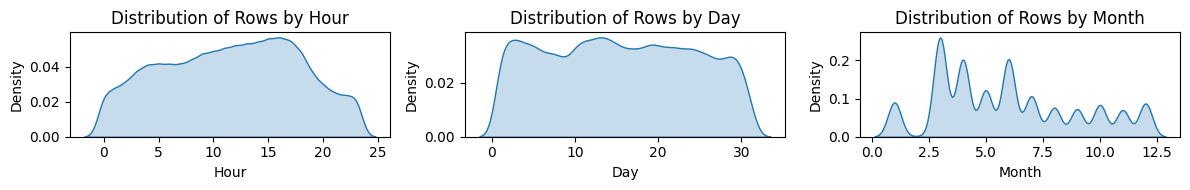

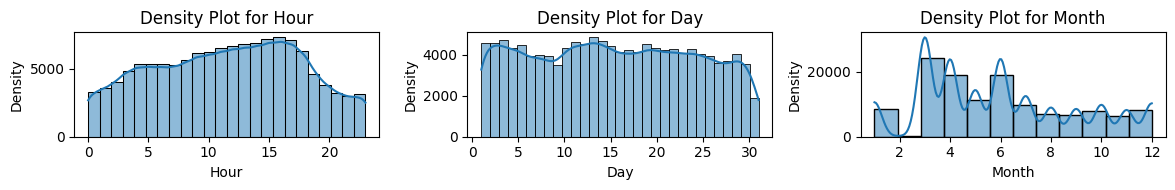

In [3]:
# Use the above information to generate a new sample that is statistically significant and representative of the original data through time-based sampling.
from utils.fnSampling import get_new_sample, get_processed_sample
from utils.fnPlots import plot_kde, plot_hist
import seaborn as sns
import matplotlib.pyplot as plt

# Get the sample using the calculated ratio
sampled_data = get_new_sample(0.0035)
# Plotting KDE and Histogram for sampled data
plot_kde(sampled_data, 12, 2)
plot_hist(sampled_data, 12, 2)

#### Dataset sample staging

In [14]:
import logging
import pandas as pd
from utils import fnSampling 
# Configure logging
logging.basicConfig(level=logging.INFO)

# Note: The following datasets were sourced using Power Analysis with Alpha 0.05, Power 0.8, Effect 0.01
# Time stratified sampling was performed by hour
# The reasoning for these specific parameters can be found in README.md
# Examples are named using the suffix that details its properties (Alpha 0.05, Power 0.8, Effect 0.01)

# Get a random set that was pulled using the Power Analysis
#sample_random_A05P8E01 = get_processed_sample('./data/datasets/TSRS/')

# Get specific sample from directory
sample_name = 'sampled_sr0.0035_A05P8E01_3_label'
sample_A05P8E01 = fnSampling.reservoir_sample_directory(pd.read_parquet(f'./data/datasets/TSRS/{sample_name}.parquet'), len(100000))

# Process data if required or confirm quality
#data = sample_A05P8E01[sample_A05P8E01['text_clean'] != ''].dropna(subset=['text_clean']).drop_duplicates(subset=['thread_id'])
# Reprocess data to include ALL available text in each row (considering that the dataset creation script masks profanity and uses alternative processing methods)
#data["text_clean"] = data["text_clean"].astype(str).apply(remove_urls).astype(str).apply(remove_whitespace).astype(str)

##### **Optimal threshold discovery**:
- The quality of the data profoundly affects the outcomes of the model (citation needed). It's vital to note that the similarity function is applied to both categories of data (SPAM/DIALOG and NOT_SPAM/NONDIALOG).
- The training data should consist of high-quality dialog content, as higher similarity scores will reflect a more accurate capture of genuine dialog (meaning inclusion, not a positive sentiment). Conversely, non-dialog data is generally expected to score lower in similarity (reasioning: most children's speech patterns are quite similar, but as they develop, distinctive patterns emerge)

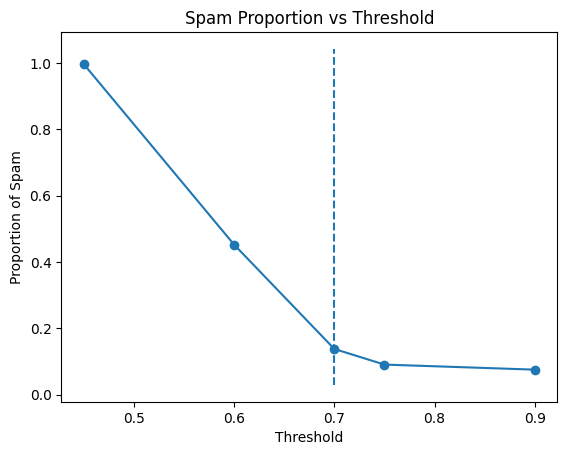

Optimal threshold for significant drop-off: 0.7


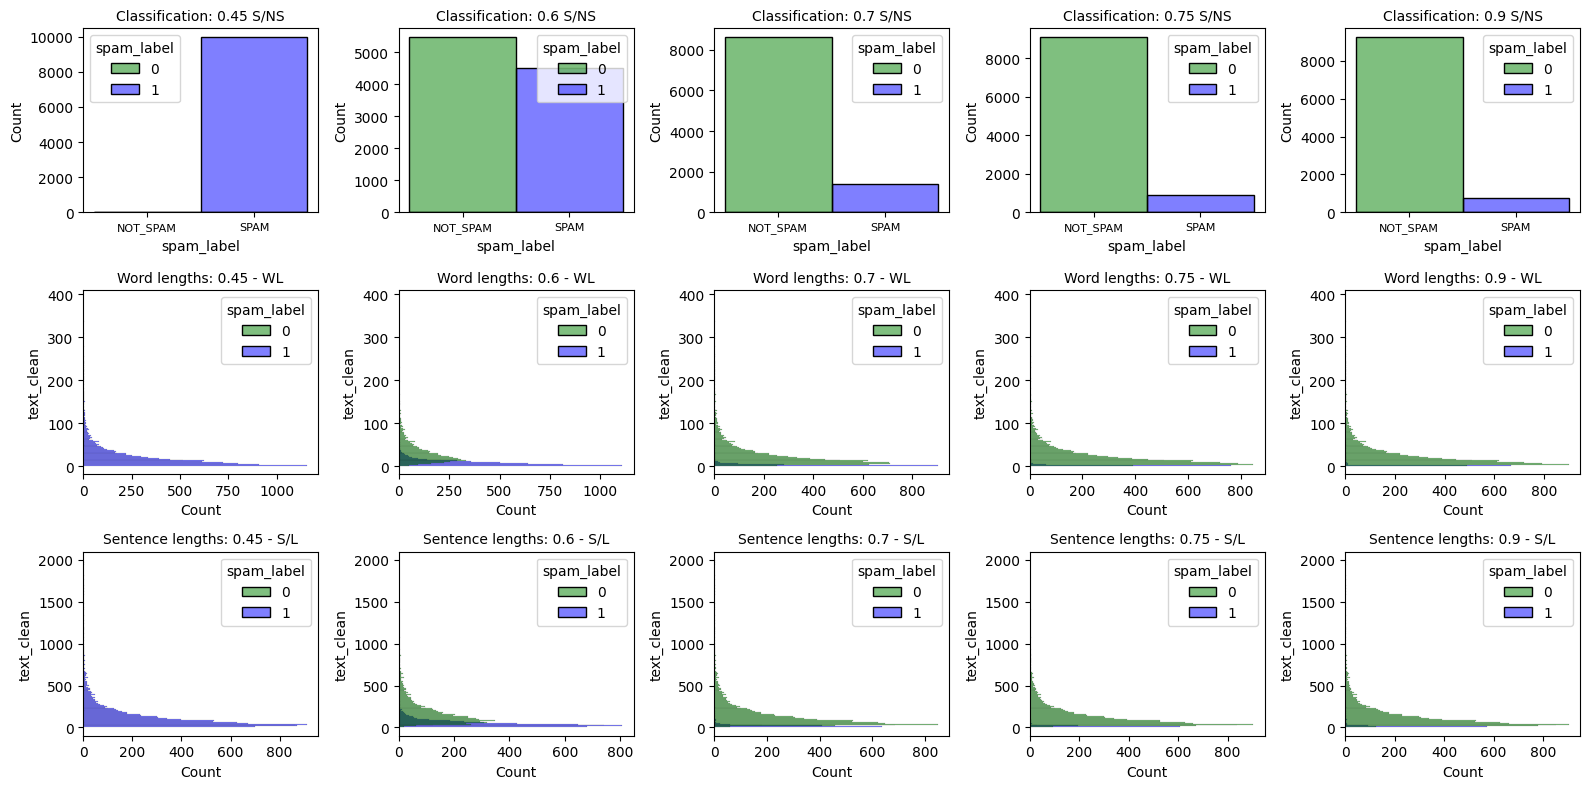

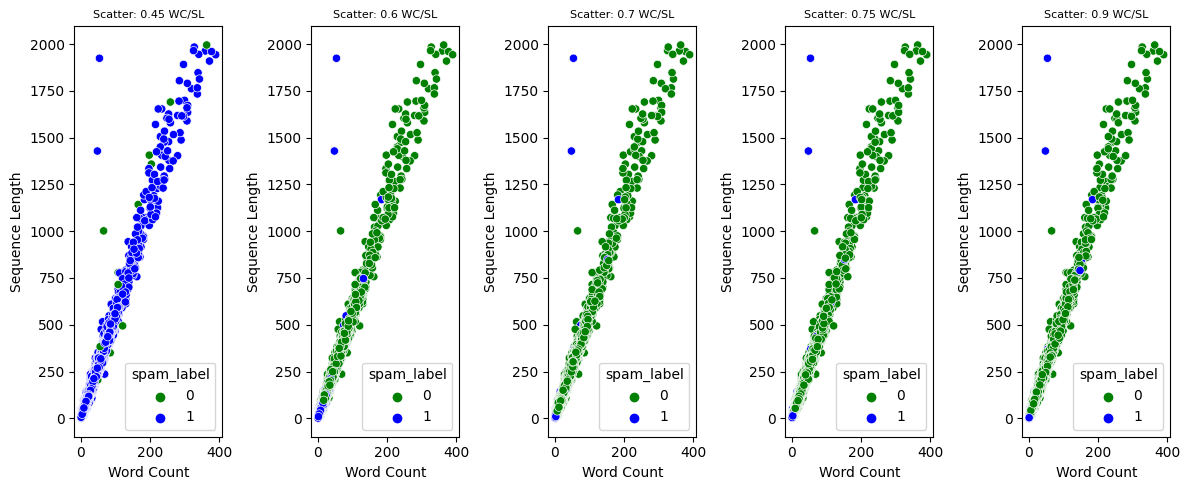

In [15]:
from utils import fnTesting
from utils import fnPlots
data = sample_A05P8E01.copy()  
params = {
    'sample_size': [len(data)],
    'similarity_threshold': [0.45,0.6,0.7,0.75,0.9]
}
optimal_threshold, results ,summary_table = fnTesting.evaluate_spam_threshold(data, params)
results = fnTesting.grid_search(data, params)
# Create a summary table from the grid search results
# This likely organizes the results in a format that facilitates further analysis and visualization
summary_table = fnPlots.create_summary_table(results)
# Plot the histograms and scatter charts based on the results
# These visualizations presumably help to convey the key insights and patterns found in the analysis
fnPlots.plot_histograms(results)
fnPlots.plot_scatter_charts(results)

In [ ]:
# List of sample sizes to test, which are fractions of the total sample size
# These specific fractions can be customized to explore the granularity and robustness of your analysis
sample_sizes_to_test = [sample_size // 2, sample_size // 4, sample_size // 16, sample_size // 32]

# Loop through the sample sizes and perform the analysis for each
for current_sample_size in sample_sizes_to_test:
    print(f"Running analysis for sample size: {current_sample_size}")
    '''
    Demonstrate how you can go from the statistically significant sample size and progress down to a reasonable amount. 
    This process provides a reference for using small data samples to investigate the relationship between 
    similarity thresholds and the proportion of spam.
    '''
    # Ensure that the current sample size is not larger than the size of 'data'
    # This is an essential safeguard, particularly if this code is going to be used with different datasets
    actual_sample_size = min(current_sample_size, len(data))

    # Randomly sample the data without replacement to get the current sample size
    # It ensures that each subset of data is uniquely representative of the whole
    sampled_data = data.sample(actual_sample_size)
    params = {
        'sample_size': [actual_sample_size],
        'similarity_threshold': [0.45,0.6,0.7,0.75,0.9]
    }

    results = fnTesting.grid_search(sampled_data, params)
    summary_table = fnPlots.create_summary_table(results)
    plot_histograms(results)
    plot_scatter_charts(results)

cluster
0     0.043165
1     0.000000
2     1.000000
3     1.000000
4     0.000000
5     0.000000
6     0.851852
7     0.000000
8     0.000000
9     0.000000
10    0.250000
11    0.315789
12    0.000000
13    0.000000
14    0.031250
15    0.000000
16    0.000000
17    0.000000
Name: spam_label, dtype: float64


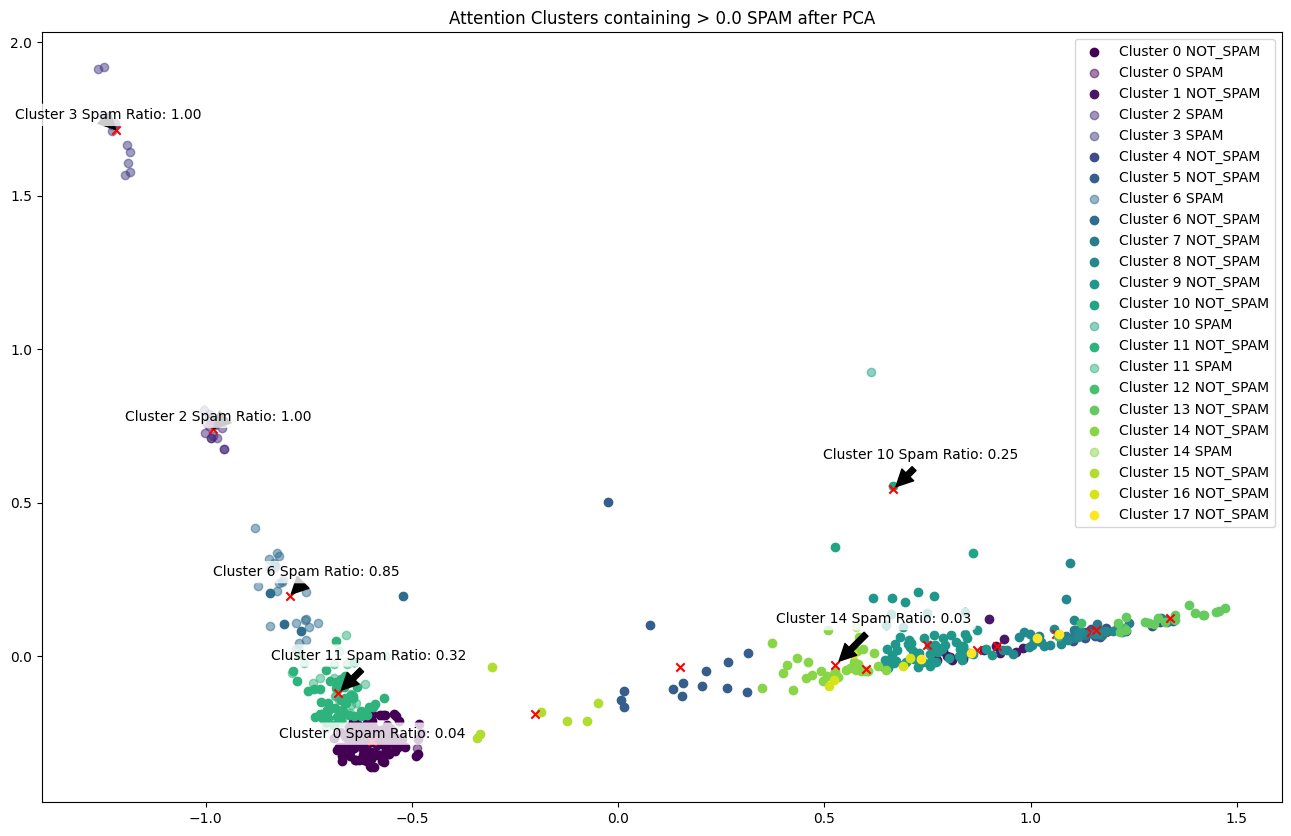

In [2]:
from utils.fnPlots import profile_date, plot_hist, plot_kde
from srcs import attention_filter
from srcs.labeler import DialogDetector, apply_detector

# Perform clustering and visualize the results
spam_ratio, labeled_data, similarity_training_data, spam_detector = apply_detector(data, optimal_threshold + 0.1, len(data))
fig, cluster_spam_ratio, data_clustered = attention_filter.main_plotting(labeled_data, max_length=512, show_scatter=True)
# Identify clusters with a specific spam ratio and filter the data for further classification
cluster_ratios = cluster_spam_ratio[cluster_spam_ratio > 0.01].index.tolist()